# Read in Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/reviews.csv")
df.drop('Id', axis=1, inplace=True)
df.head()

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4


# Explore Data

In [3]:
print(df.columns)
print(df.shape)

Index(['Review', 'Label'], dtype='object')
(107018, 2)


In [4]:
# Missing values summary
print(df.isnull().sum())


Review    0
Label     0
dtype: int64


In [5]:
# Blank string or whitespace-only
blank_reviews = df[df['Review'].str.strip() == '']
print(f"Number of blank reviews: {len(blank_reviews)}")
print(f"Duplicate rows: {df.duplicated().sum()}")

Number of blank reviews: 0
Duplicate rows: 6546


In [6]:
df = df.drop_duplicates()

In [7]:
print(df['Label'].value_counts(normalize=True).round(3) * 100)


Label
5    72.9
4    17.5
3     5.0
1     2.4
2     2.2
Name: proportion, dtype: float64


Label
5    73276
4    17558
3     5016
1     2403
2     2219
Name: count, dtype: int64


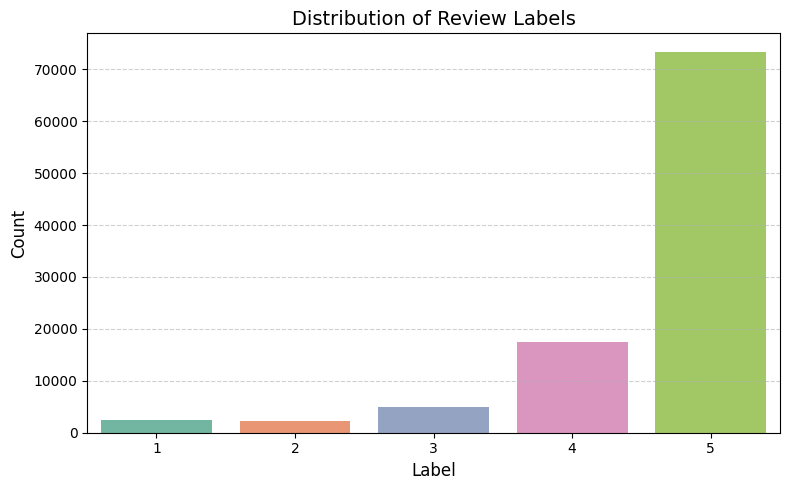

In [8]:
print(df['Label'].value_counts(dropna=False))
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label', hue='Label', palette='Set2', legend=False)

plt.title('Distribution of Review Labels', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

count    100472.000000
mean         26.194721
std          32.912392
min           1.000000
25%           8.000000
50%          16.000000
75%          32.000000
max        1338.000000
Name: review_length, dtype: float64


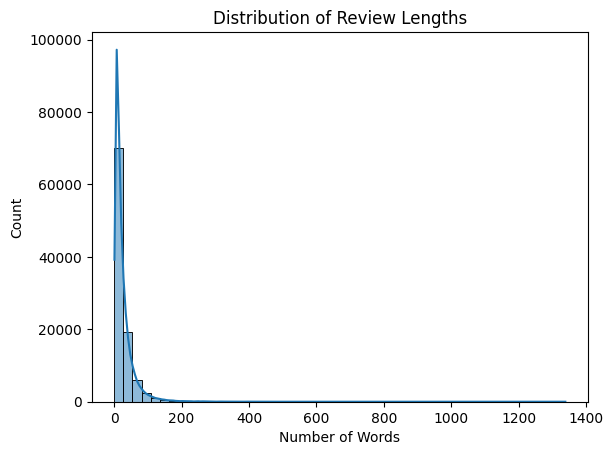

In [10]:
df['review_length'] = df['Review'].str.split().apply(len)

print(df['review_length'].describe())

sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.show()

